# Logistic Regression 

LR 虽然名称带有Regerssion， 但经常是作为Classification使用而非预测模型。  

与此同时， LR还有另一个名字， 叫做 最大熵分类器 （Maximum-Entropy {MaxEnt} Classification)  / 
或 Log-Linear分类器。 

## 正则化



https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py

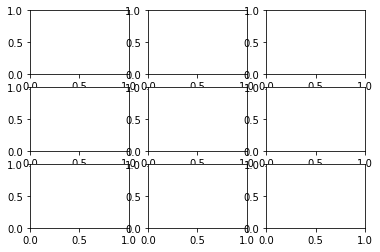

In [4]:
import numpy  as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
# 对数据进行标准化
X = StandardScaler().fit_transform(X)

# classify small against large digits 
y = (y>4).astype(np.int)


TypeError: __init__() got an unexpected keyword argument 'l1_ratio'

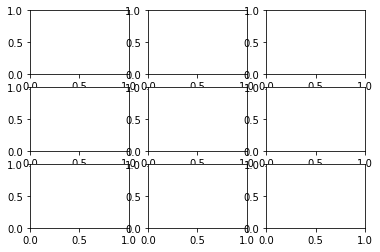

In [16]:

# L1 weight in the Elastic-Net regularization
l1_ratio = 0.5 

fig, axes = plt.subplots(3, 3)



# Set regularization parameter
for i, (C, axes_row) in enumerate(zip( (1, 0.1, 0.01), axes)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C = C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C = C, penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C = C, penalty='elasticnet', tol=0.01, solver='saga', l1_ratio=l1_ratio)
    
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)
    
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()
    
    # coef_l1_LR contains zeros due to the 
    # L1 sparsity inducing norm
    
    sparsity_L1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100
    
    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    
    print("{:<40} {.2f}".format("Score with L1 penalty:", clf_l1_LR.score(X, y)))
    print("{:<40} {.2f}".format("Score with Elastic-Net penalty:", clf_en_LR.score(X, y)))
    print("{:<40} {.2f}".format("Score with L2 penalty:", clf_l2_LR.score(X, y)))
    
    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")
        
    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR ]):
        ax.imshow(np.abs(coefs.reshape(8, 8)), interpolation='nearest', cmap='binary', vmax=1, vmin=0)
        ax.set_xticks(())
        ax.set_yticks(())
        
    axes_row[0].set_ylabel('C = %s' %C)


In [6]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13918ecd0>,
      dtype=object)